In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#why are we using a modulo operator ever?
#what is role of gpe_bl and gpi_bl, will likely require reading...

In [128]:
class b_ganglia:
    def __init__(self,n_loops,time_steps):

        self.n_loops=n_loops

        #activations for all units
        self.a_sd1 = np.zeros((time_steps, n_loops))
        self.a_sd2 = np.zeros((time_steps, n_loops))
        self.a_stn = np.zeros((time_steps, n_loops))
        self.a_gpi = np.ones((time_steps, n_loops))
        self.a_gpe = np.zeros((time_steps, n_loops))
        self.a_tha = np.zeros((time_steps, n_loops))
        self.a_ctx = np.zeros((time_steps, n_loops))

        #vector to hold the inputs...
        self.a_inp = np.ones((time_steps, n_loops)) * 0.05

        for i in range(30):
            self.a_inp[i+15] = [0.3,0.4,0.3]

        #variable to keep track of what step we are currently on
        self.c = 0




    #uses euler integration to calculate the activation at each unit in the model of the basal ganglia 
    def step(self, i, da):

        #likely easier to just define the parameters inside this function...
        
        dt = 0.001
        tau = 0.01
        #time constant 
        h= dt/tau

        #define the weight matrices
        w_inp_sp1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) * 10
        w_inp_stn = np.array([[1,0,0],[0,1,0],[0,0,1]]) * 0
        w_ctx_sp1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) * 10
        w_ctx_sp2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) * 0
        w_ctx_stn = np.array([[1,0,0],[0,1,0],[0,0,1]]) * 0
        w_sd1_gpi = np.array([[1,0,0],[0,1,0],[0,0,1]]) * -5
        w_sd2_gpe = np.array([[1,0,0],[0,1,0],[0,0,1]]) * -0
        w_stn_gpi = np.ones((self.n_loops,self.n_loops)) * 0
        w_stn_gpe = np.ones((self.n_loops,self.n_loops)) * 0
        w_gpe_stn = np.ones((self.n_loops,self.n_loops)) * -0
        w_gpe_gpi = np.ones((self.n_loops,self.n_loops)) * -0
        w_gpi_tha = np.array([[1,0,0],[0,1,0],[0,0,1]]) * -12
        w_tha_ctx = np.array([[1,0,0],[0,1,0],[0,0,1]]) * 15


        #define the sensitivies to dopamine and normal response
        sd1_bl = 0.1
        sd1_DA = 1
        sd2_bl = 0.1
        sd2_DA = 20
        gpi_bl = 0.1
        gpe_bl = 0.1
        

        #input to sd1 from cortex modulated by dopamine, this completes the loop
        self.a_sd1[i+1] = self.non_lin(h * (-1 * self.a_sd1[i] + (sd1_bl + sd1_DA * da) * (np.matmul(self.a_ctx[i], w_ctx_sp1)+ np.matmul(self.a_inp[i], w_inp_sp1))))

        #input to sd2 modulated by dopamine
        self.a_sd2[i+1] = self.non_lin(h * (-1 * self.a_sd2[i] + (1/(sd2_bl + sd2_DA * da)) * (np.matmul(self.a_ctx[i], w_ctx_sp2)))) 

        #input to stn from ctx and gpe
        self.a_stn[i+1] = self.non_lin(h * (-1 * self.a_stn[i] + (np.matmul(self.a_ctx[i], w_ctx_stn)) + np.matmul(self.a_gpe[i], w_gpe_stn)) + (np.matmul(self.a_inp[i], w_inp_stn)))

        #input to gpe from stn and sd2
        self.a_gpe[i+1] = self.non_lin(h * (-1 * self.a_gpe[i]) + (np.matmul(self.a_sd2[i], w_sd2_gpe)) + (np.matmul(self.a_stn[i], w_stn_gpe)))

        #input to gpi from strd1, stn, and gpe 
        self.a_gpi[i+1] = self.non_lin(h * (-1 * self.a_gpi[i] + (np.matmul(self.a_sd1[i], w_sd1_gpi))   + (np.matmul(self.a_stn[i], w_stn_gpi)) + (np.matmul(self.a_gpe[i], w_gpe_gpi)) + 5))

        #input to thalamus from gpi 
        self.a_tha[i+1] = self.non_lin(h * (-1 * self.a_gpi[i] + (np.matmul(self.a_gpi[i], w_gpi_tha)) + 5))

        #input to cortex from gpi, also going to give some tonic excitation
        self.a_ctx[i+1] = self.non_lin(h * (-1 * self.a_ctx[i] + (np.matmul(self.a_tha[i], w_tha_ctx))))


        
        self.c += 1

        return None

    #non-linearity to generate activations
    def non_lin(self,vec):

        #apply non-linearity
        x = np.tanh(1*(vec)+0)
        
        #set any negative values to 0
        for i in range(self.n_loops):
            if x[i] < 0:
                x[i] = 0
        
        return x

    def run(self, steps):
        
        for i in range(steps):
            self.step(i=self.c,da=1)

    def display(self):
        
        plt.figure()
        plt.plot(self.a_inp,alpha=0.5)

        plt.figure()
        plt.plot(self.a_sd1,alpha=0.5)

        plt.figure()
        plt.plot(self.a_gpi,alpha=0.5)

        plt.figure()
        plt.plot(self.a_tha,alpha=0.5)

        plt.figure()
        plt.plot(self.a_ctx,alpha=0.5)

        return None



[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00606627 0.00606627 0.00606627]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.11822916 0.17446198 0.11822916]
 [0.09074757 0.13770053 0.09074757]
 [0.09450872 0.14264173 0.09450872]
 [0.09405247 0.14205446 0.09405247]
 [0.1912751  0.2672551  0.1912751 ]
 [0.14366401 0.21255117 0.14366401]
 [0.1574564  0.22773566 0.1574564 ]
 [0.15443151 0.22453959 0.15443151]
 [0.22596051 0.29638484 0.22596051]
 [0.17367188 0.25016455 0.17

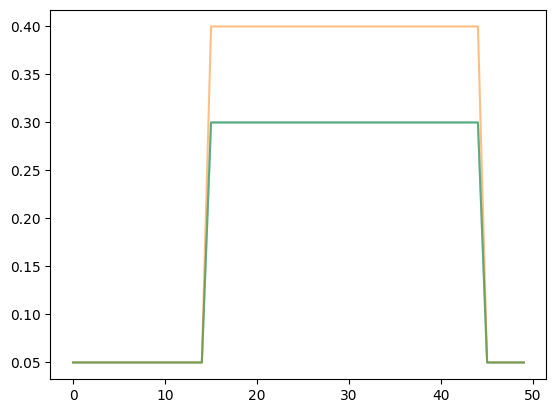

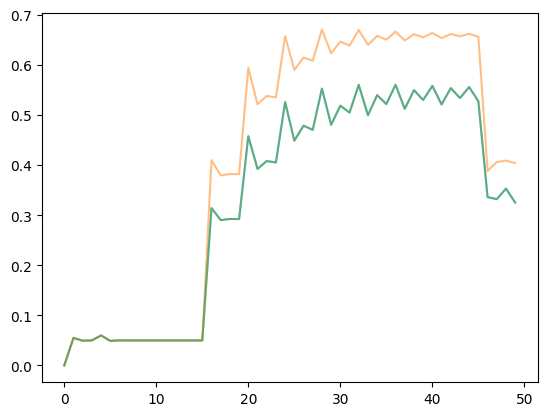

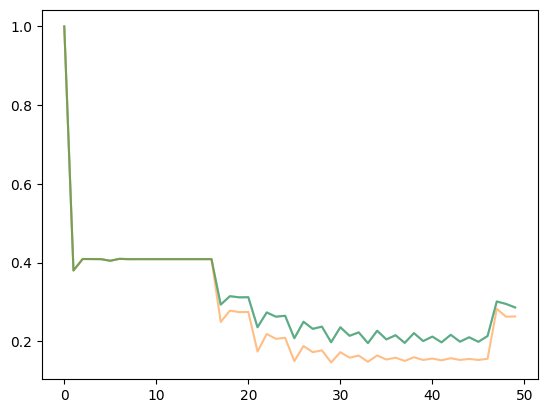

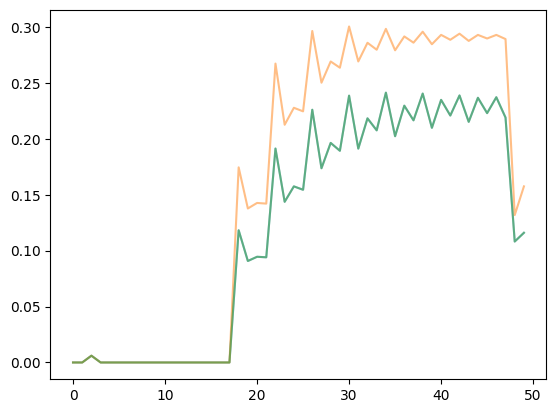

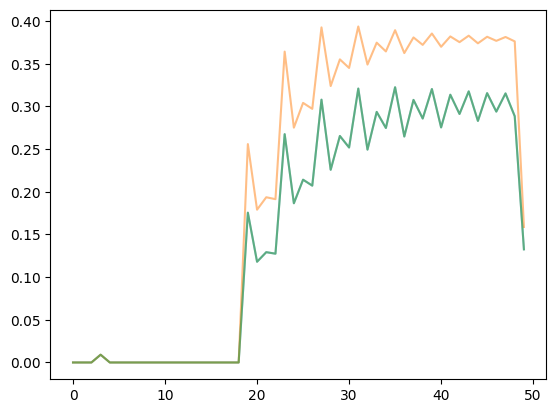

In [129]:
bg = b_ganglia(3,50)

bg.run(49)
print(bg.a_tha)
bg.display()


